Accessing only ITC data till 2024 -> March 31st, 2024

In [2]:
pip install statsforecast

In [3]:
import pandas as pd

In [4]:
itc_df = pd.read_csv("ITC_2024.csv")
itc_test = pd.read_csv("ITC_Test.csv")

In [5]:
itc_df

,date,series,open,high,low,prev._close,ltp,close,vwap,52w_h,52w_l,volume,value,no_of_trades
0,2000-04-03,EQ,739.90,800.80,721.05,741.45,792.75,797.00,772.76,1140.8,580.00,1720025,1.329165e+09,NaN
1,2000-04-04,EQ,785.00,785.00,733.25,797.00,733.25,733.25,744.37,1140.8,580.00,581309,4.327067e+08,NaN
2,2000-04-05,EQ,680.00,740.00,675.05,733.25,696.10,698.75,700.53,1140.8,580.00,706269,4.947637e+08,NaN
3,2000-04-06,EQ,705.00,711.00,646.10,698.75,685.00,682.80,676.06,1140.8,580.00,431386,2.916423e+08,NaN
4,2000-04-07,EQ,682.00,733.90,682.00,682.80,730.00,730.95,722.23,1140.8,580.00,1087357,7.853181e+08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5976,2024-03-21,EQ,419.00,422.00,416.20,415.70,421.25,421.25,419.96,499.7,372.00,19227982,8.074987e+09,265798.0
5977,2024-03-22,EQ,421.25,429.65,421.25,421.25,428.30,428.60,427.27,499.7,372.00,38861818,1.660465e+10,285729.0
5978,2024-03-26,EQ,425.55,429.20,425.55,428.60,428.00,427.65,427.57,499.7,376.35,10274145,4.392964e+09,127865.0
5979,2024-03-27,EQ,427.00,428.90,426.45,427.65,428.40,428.00,427.94,499.7,376.35,12227545,5.232703e+09,148670.0


In [6]:
itc_df.columns

Index(['date', 'series', 'open', 'high', 'low', 'prev._close', 'ltp', 'close',
       'vwap', '52w_h', '52w_l', 'volume', 'value', 'no_of_trades'],
      dtype='object')

| Column         | Description                                                  | Usage Ideas                                 |
| -------------- | ------------------------------------------------------------ | ------------------------------------------- |
| `date`         | Trading date                                                 | Index for time series, plotting, resampling |
| `series`       | Usually indicates the type of security (e.g., EQ for equity) | Filter for just equity if needed            |
| `open`         | Opening price of the day                                     | Calculate gaps, day range                   |
| `high`         | Highest price during the day                                 | Identify resistance                         |
| `low`          | Lowest price during the day                                  | Identify support                            |
| `prev._close`  | Previous day closing price                                   | Calculate returns or price changes          |
| `ltp`          | Last traded price                                            | Useful for intraday or real-time analysis   |
| `close`        | Closing price of the day                                     | Core price for indicators and forecasting   |
| `vwap`         | Volume Weighted Average Price                                | Useful for volume-based trading strategies  |
| `52w_h`        | 52-week high price                                           | Useful for breakout strategies              |
| `52w_l`        | 52-week low price                                            | Useful for support identification           |
| `volume`       | Number of shares traded                                      | Analyze liquidity, volume spikes            |
| `value`        | Total value traded (price \* volume)                         | Confirmation of volume moves                |
| `no_of_trades` | Number of trades executed                                    | Market activity indicator                   |


In [7]:
import pandas as pd

# Convert 'date' to datetime and sort
itc_df['date'] = pd.to_datetime(itc_df['date'])
itc_df = itc_df.sort_values('date').reset_index(drop=True)

# If needed, filter for series 'EQ' (equity)
itc_df = itc_df[itc_df['series'] == 'EQ']

# Set date as index
itc_df.set_index('date', inplace=True)

In [8]:
# Simple Moving Averages
itc_df['SMA_20'] = itc_df['close'].rolling(window=20).mean()
itc_df['SMA_50'] = itc_df['close'].rolling(window=50).mean()

# RSI Calculation
delta = itc_df['close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
itc_df['RSI'] = 100 - (100 / (1 + rs))

# Bollinger Bands
itc_df['stddev'] = itc_df['close'].rolling(window=20).std()
itc_df['BB_upper'] = itc_df['SMA_20'] + (2 * itc_df['stddev'])
itc_df['BB_lower'] = itc_df['SMA_20'] - (2 * itc_df['stddev'])

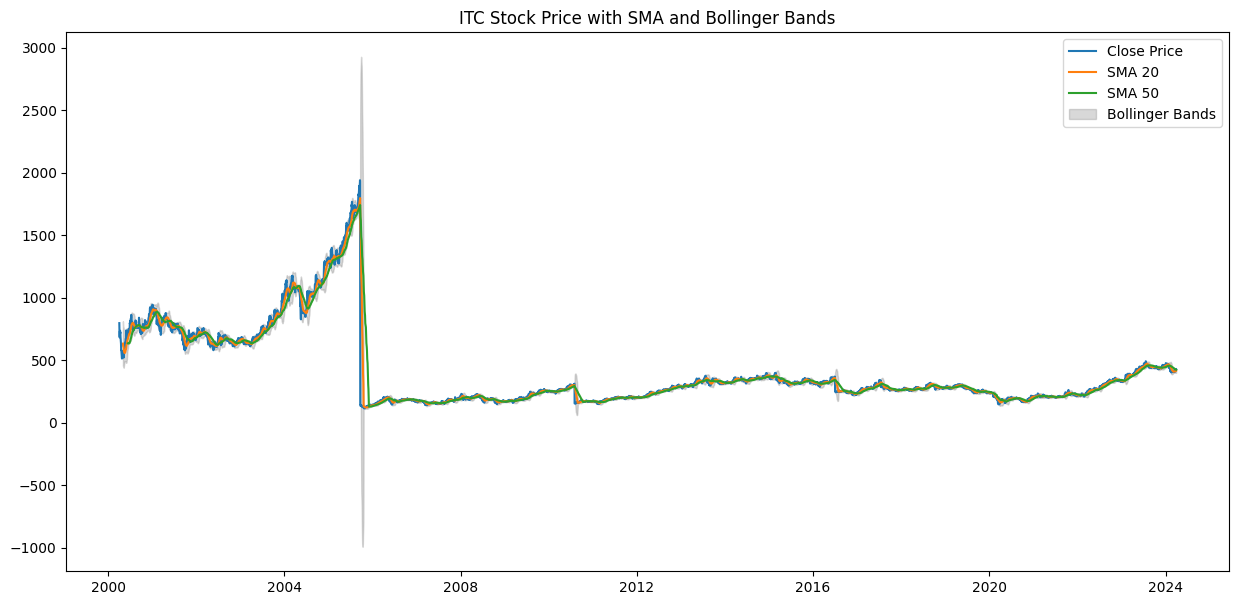

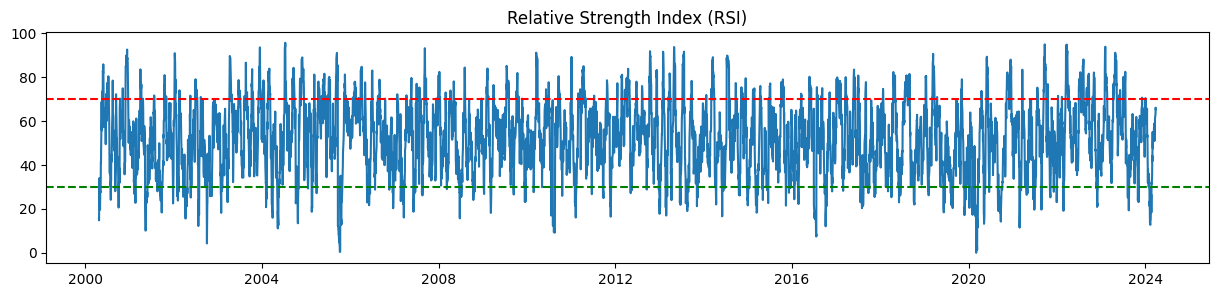

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
plt.plot(itc_df.index, itc_df['close'], label='Close Price')
plt.plot(itc_df.index, itc_df['SMA_20'], label='SMA 20')
plt.plot(itc_df.index, itc_df['SMA_50'], label='SMA 50')
plt.fill_between(itc_df.index, itc_df['BB_lower'], itc_df['BB_upper'], color='grey', alpha=0.3, label='Bollinger Bands')
plt.legend()
plt.title('ITC Stock Price with SMA and Bollinger Bands')
plt.show()

plt.figure(figsize=(15,3))
plt.plot(itc_df.index, itc_df['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.show()


In [10]:
itc_df.columns

Index(['series', 'open', 'high', 'low', 'prev._close', 'ltp', 'close', 'vwap',
       '52w_h', '52w_l', 'volume', 'value', 'no_of_trades', 'SMA_20', 'SMA_50',
       'RSI', 'stddev', 'BB_upper', 'BB_lower'],
      dtype='object')

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_price_trend_itc(start_date=None, end_date=None, column='close'):
    
    """
    Plots ITC stock price trend for a given date range from itc_df with datetime index.
    
    Parameters:
    - start_date: 'YYYY-MM-DD' or pd.Timestamp
    - end_date: 'YYYY-MM-DD' or pd.Timestamp
    - column: price column to plot (default = 'close')
    """

    df = itc_df.copy()

    # Ensure the index is datetime
    if not isinstance(df.index, pd.DatetimeIndex):
        df.index = pd.to_datetime(df.index)

    # Filter by date range using index
    if start_date:
        df = df[df.index >= pd.to_datetime(start_date)]
    if end_date:
        df = df[df.index <= pd.to_datetime(end_date)]

    # Sort just in case
    df = df.sort_index()

    if df.empty:
        print("No data available for the selected date range.")
        return

    # Plot
    plt.figure(figsize=(12, 5))
    plt.plot(df.index, df[column], label=f'{column.title()} Price', color='teal')
    plt.title(f'ITC {column.title()} Price Trend')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


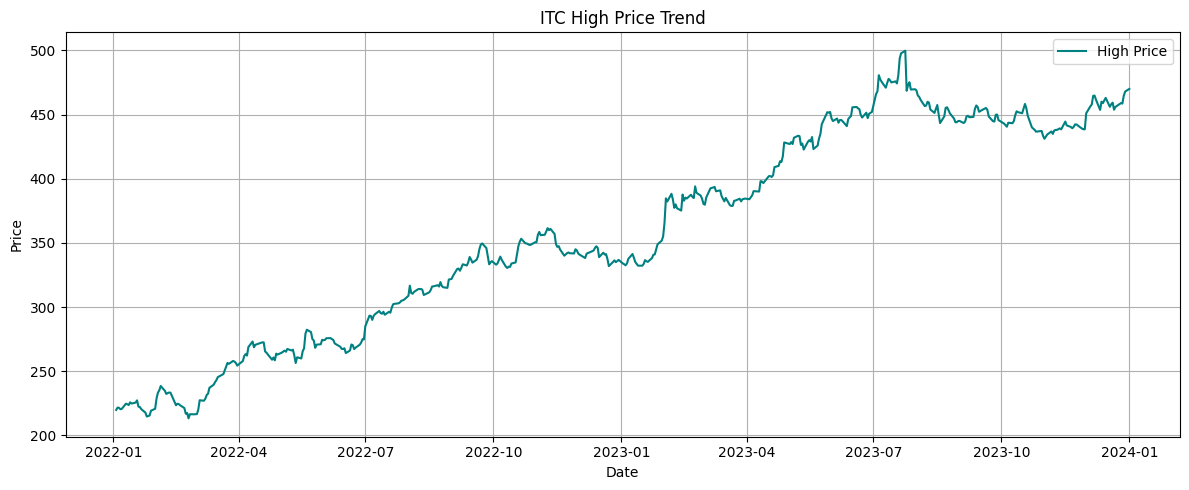

In [12]:

# High prices instead of close
plot_price_trend_itc(start_date='2022-01-01', end_date='2024-01-01', column='high')